# DBSCAN
(eps=0.5, min_samples=5, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=30, p=None, n_jobs=1)

* <font color=red>eps </font>: float, optional  
ϵϵ-邻域的距离阈值，和样本距离超过ϵϵ的样本点不在ϵϵ-邻域内。默认值是0.5.一般需要通过在多组值里面选择一个合适的阈值。eps过大，则更多的点会落在核心对象的ϵϵ-邻域，此时我们的类别数可能会减少， 本来不应该是一类的样本也会被划为一类。反之则类别数可能会增大，本来是一类的样本却被划分开。
* <font color=red>min_samples</font> : int, optional  
样本点要成为核心对象所需要的ϵϵ-邻域的样本数阈值。默认值是5. 一般需要通过在多组值里面选择一个合适的阈值。通常和eps一起调参。在eps一定的情况下，min_samples过大，则核心对象会过少，此时簇内部分本来是一类的样本可能会被标为噪音点，类别数也会变多。反之min_samples过小的话，则会产生大量的核心对象，可能会导致类别数过少。
* <font color=red>metric</font> : string, or callable  
欧式距离 “euclidean”,曼哈顿距离 “manhattan”,切比雪夫距离“chebyshev”,闵可夫斯基距离 “minkowski”,带权重闵可夫斯基距离 “wminkowski”,标准化欧式距离 “seuclidean”,马氏距离“mahalanobis”
* <font color=red>algorithm </font>: 【{'auto', 'ball_tree', 'kd_tree', 'brute'}, optional 最近邻搜索算法参数 默认：auto
brute是蛮力实现，kd_tree是KD树实现，ball_tree是球树实现,  
auto则会在三种算法中做权衡，选择一个拟合最好的最优算法】
* <font color=red>leaf_size</font> : int, optional (default = 30)  
使用KD树或者球树时,停止建子树的叶子节点数量的阈值 默认：30（最近邻搜索算法的参数）
* <font color=red>p</font> : float, optional   
只用于闵可夫斯基距离和带权重闵可夫斯基距离中p值的选择 默认：None  p=1为曼哈顿距离， p=2为欧式距离
* <font color=red>n_jobs</font> : int, optional  
(default = 1) 使用的进程数量，默认为：1 若值为 -1，则用所有的CPU进行运算

In [1]:
data = [['Budweiser', 144, 15, 4.7, 0.43],
 ['Schlitz', 151, 19, 4.9, 0.43],
 ['Lowenbrau', 157, 15, 0.9, 0.48],
 ['Kronenbourg', 170, 7, 5.2, 0.73],
 ['Heineken', 152, 11, 5.0, 0.77],
 ['Old_Milwaukee', 145, 23, 4.6, 0.28],
 ['Augsberger', 175, 24, 5.5, 0.4],
 ['Srohs_Bohemian_Style', 149, 27, 4.7, 0.42],
 ['Miller_Lite', 99, 10, 4.3, 0.43],
 ['Budweiser_Light', 113, 8, 3.7, 0.4],
 ['Coors', 140, 18, 4.6, 0.44],
 ['Coors_Light', 102, 15, 4.1, 0.46],
 ['Michelob_Light', 135, 11, 4.2, 0.5],
 ['Becks', 150, 19, 4.7, 0.76],
 ['Kirin', 149, 6, 5.0, 0.79],
 ['Pabst_Extra_Light', 68, 15, 2.3, 0.38],
 ['Hamms', 139, 19, 4.4, 0.43],
 ['Heilemans_Old_Style', 144, 24, 4.9, 0.43],
 ['Olympia_Goled_Light', 72, 6, 2.9, 0.46],
 ['Schlitz_Light', 97, 7, 4.2, 0.47]]

In [2]:
import pandas as pd
df = pd.DataFrame(data,columns=["name","calories","sodium","alcohol","cost"])
X = df[["calories","sodium","alcohol","cost"]]
X.head()

,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77


In [3]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=3,metric="euclidean").fit(X)

In [4]:
labels = db.labels_
X['cluster_db'] = labels
X.sort_values('cluster_db').head()

,calories,sodium,alcohol,cost,cluster_db
9,113,8,3.7,0.40,-1
3,170,7,5.2,0.73,-1
15,68,15,2.3,0.38,-1
6,175,24,5.5,0.40,-1
18,72,6,2.9,0.46,-1


In [5]:
X.groupby('cluster_db').mean()

,calories,sodium,alcohol,cost
cluster_db,,,,
-1,119.600000,12.000000,3.920000,0.474000
0,146.250000,17.250000,4.383333,0.513333
1,99.333333,10.666667,4.200000,0.453333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000130A7A14518>,
      dtype=object)

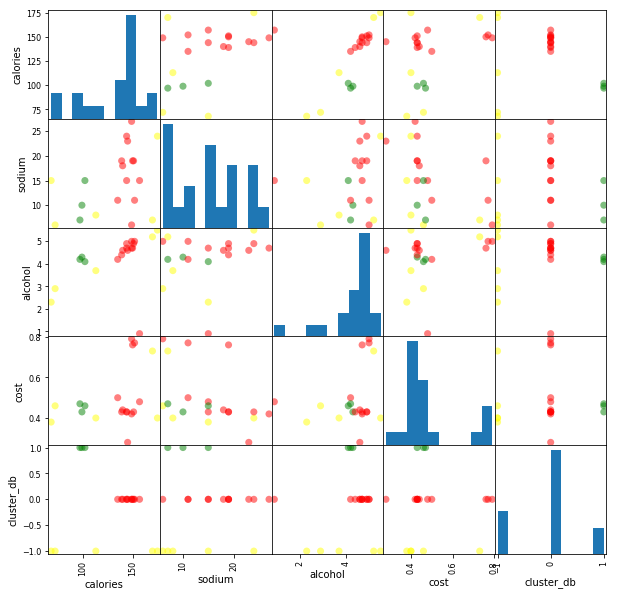

In [7]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])
pd.scatter_matrix(X,c=colors[X.cluster_db], figsize=(10,10), s=200)